# INSY695-078 Final Project: Analysis of Hotel Booking Cancellations

End to end project using Predictive Modeling and Causal Inference for Hotel Booking Cancellation Insights

# PART 1: DATA EXPLORATION

# Import the Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import re
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hotel_booking.csv")
drive.mount("/content/drive", force_remount=True)
data.head()

Mounted at /content/drive


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Getting an overview of Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Key points about the dataset structure are:

- Data Types: The DataFrame contains a mix of data types including integers, floating-point numbers, objects, and a datetime column.
- Non-Null Counts: All columns have nearly complete data with 119,390 non-null entries, except for 'children', 'country', 'agent', 'company', and 'days_in_waiting_list', which have fewer non-null values indicating the presence of missing data.
- Columns of Interest:
  - 'is_canceled': A binary integer column indicating if a booking was canceled.
  - 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month': Integer columns related to the timing of the bookings.
  - 'stays_in_weekend_nights', 'stays_in_week_nights': Integer columns indicating the length of stay.
  - 'adults', 'children', 'babies': Floating-point columns indicating the number of people in each booking.
  - 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type': Object columns representing categorical data.
  - 'reservation_status_date': A datetime column detailing when the reservation status was last updated.

# Summary Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Numeric Variables:

The data reveals the typical booking patterns, durations, and guest demographics, as well as highlighting areas with high variability such as lead time and ADR, which may require further investigation to understand the underlying causes.

- Cancellations: Around 37% of bookings are canceled.
- Lead Time: On average, bookings are made 104 days in advance, but there's significant variability (std of ~106 days), with some bookings made more than two years in advance (max 737 days).
- Arrival Date: The bookings span from the year 2015 to 2017, with most arrivals around the 27th week and the middle of the month.
- Stay Duration: Guests typically stay for about 2.5 weekdays and 0.9 weekend nights. However, some stays are as long as 50 nights.
- Guest Composition: Most bookings are for adults (mean slightly less than 2), with few children or babies.
- Repeat Guests: Only 3.9% of bookings are from repeat guests.
- Cancellations and Previous Bookings: Previous cancellations and non-canceled bookings are relatively low on average, but there are outliers with as many as 26 previous cancellations and 72 previous bookings not canceled.
- Booking Changes: Changes are made to around 22% of bookings.
- Agent/Company Bookings: The involvement of travel agents or companies is significant, with a wide range in the number of bookings handled by different agents/companies.
- Waiting Time: The average days on the waiting list are low, but can go up to 391 days.
- Average Daily Rate (ADR): The average price per night is about $101, with a wide range from negative values (possibly due to refunds or errors) to $5400.
- Car Parking: Very few bookings require parking spaces, but there can be up to 8 spaces required.
- Special Requests: There's an average of 0.57 special requests per booking, with a maximum of 5 requests.

In [ ]:
# Get the summary statistics for categorical variables
data.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Categorical Variables:

This summary provides a high-level understanding of the booking characteristics, customer demographics, and operational specifics such as reservation outcomes and payment methods.

- The dataset contains 119,390 entries and covers two types of hotels, with 'City Hotel' being more common.
- Guests arrive throughout the year, with August being the most common arrival month.
- The 'BB' (Bed & Breakfast) is the most frequent meal type chosen.
- Guests come from 177 different countries, predominantly from Portugal (PRT).
- The 'Online TA' (Travel Agent) is the most common market segment, while the 'TA/TO' (Travel Agent/Tour Operator) is the top distribution channel.
- Room type 'A' is both the most frequently reserved and assigned room type.
- Most bookings do not require a deposit.
- The majority of customers are classified as 'Transient'.
- Most reservations end with the status 'Check-Out', implying the stay was completed.
- The most common date for updating reservation status is October 21, 2015.
- The dataset includes a wide variety of names and email addresses, with 'Michael Johnson' and 'Michael.C@gmail.com' appearing most frequently.
- Each phone number in the dataset is unique.
- There are 9,000 unique credit card numbers used for bookings, with the last four digits '4923' appearing most frequently.

# Plotting Data Distribution

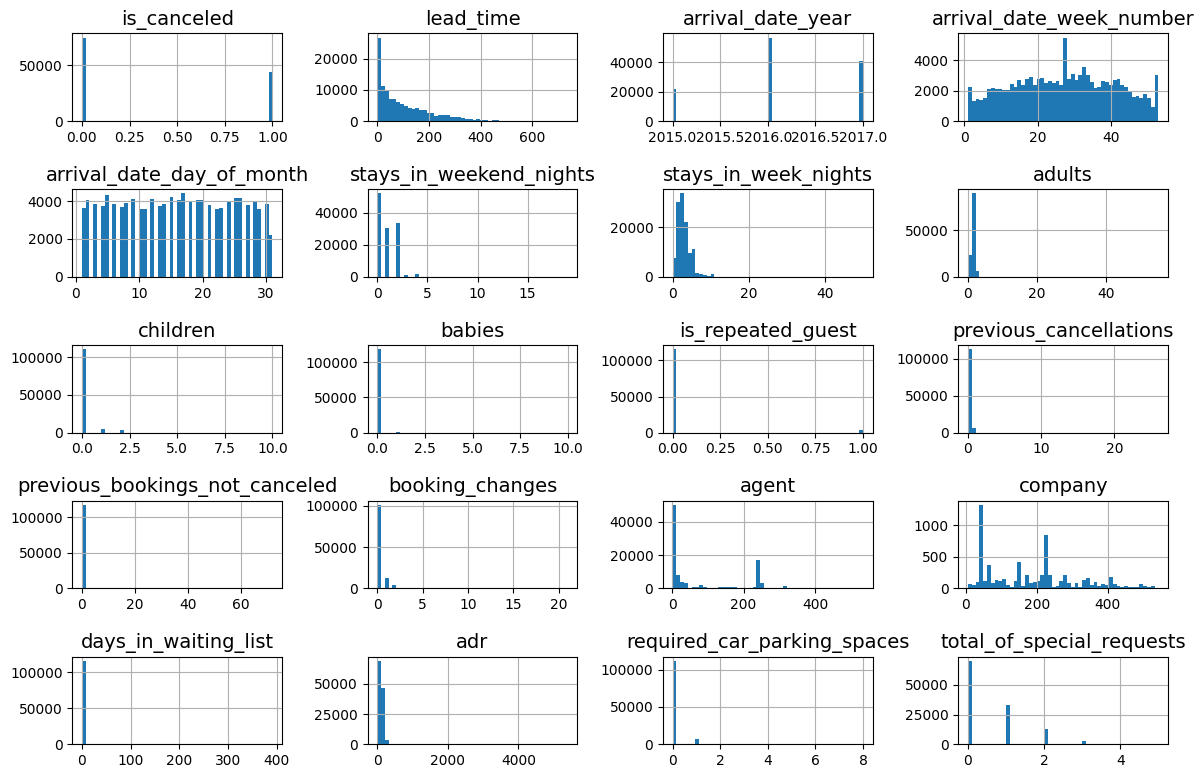

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()  # This will adjust the subplots to fit into the figure area.
plt.show()

### Based on the plot, we can infer the following about the data distribution:

1. is_canceled: There are fewer cancellations than non-cancellations.

2. lead_time: The distribution is right-skewed, meaning most bookings are made with fewer days in advance, but there are some bookings made with a very long lead time.

3. arrival_date_year: There are bars for perhaps three or four years, with one year having significantly more bookings than others.

4. arrival_date_week_number: Bookings appear to be somewhat evenly distributed throughout the year with slight increases, potentially indicating seasonal trends.

5. arrival_date_day_of_month: This distribution is relatively uniform, suggesting bookings occur throughout the month without significant day-to-day variation.

6. stays_in_weekend_nights and stays_in_week_nights: Both variables are right-skewed, indicating most stays are short, with fewer instances of longer stays.

7. adults: Most bookings are for one or two adults, with very few bookings for larger groups.

8. children and babies: The vast majority of bookings do not include children or babies, showing very low frequencies for bookings with one or more children/babies.

9. is_repeated_guest: A small proportion of bookings are from repeated guests.

10. previous_cancellations and previous_bookings_not_canceled: Both are heavily right-skewed, with most guests having no previous cancellations or bookings.

11. booking_changes: Most bookings have no changes, with a sharp drop-off as the number of changes increases.

12. agent and company: These histograms are likely showing IDs for travel agents or companies associated with the bookings. There are a few with high frequencies, suggesting some agents/companies book more frequently than others.

13. days_in_waiting_list: Almost all bookings have zero days on the waiting list, with very few having to wait one or more days.

14. adr (Average Daily Rate): The distribution is right-skewed with a peak at the lower end of the ADR, suggesting most bookings are at a lower price range with fewer high-priced bookings.

15. required_car_parking_spaces: Nearly all bookings require no car parking spaces.

16. total_of_special_requests: Most bookings have zero special requests, with a decreasing frequency as the number of requests increases.

# Count of Hotel Reservations by Reservation Status

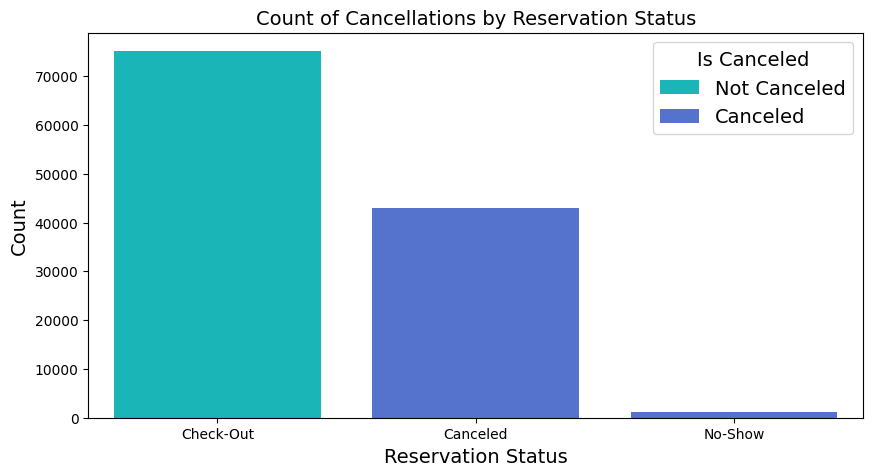

In [ ]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=data, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

#### Based the chart, a large number of reservations resulted in actual stays (check-out), and these were not canceled.There is a significant count of reservations that were canceled, indicating that these bookings did not result in a stay. A smaller number of reservations were classified as no-shows, where the guest did not arrive and did not formally cancel the booking.

#### This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

# Grouping 'Canceled' and 'No-Show' as 'Canceled' and 'Check-Out' as 'Not Canceled'

In [ ]:
data.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

reservation_status_date is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

If a booking was canceled, the reservation_status_date would be the date on which the booking was canceled, implying that is_canceled should be 1.
On the other hand, if a booking was not canceled, the reservation_status_date would reflect the date of check-out, implying that is_canceled should be 0.
Therefore, the reservation_status_date can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

However,we can extract some useful information from it.The reservation_status_date column is a date variable that represents the date of the last reservation status. Since it is a date, it will likely be in a 'YYYY-MM-DD' format. We can calculate a new column:

Days_Difference: Calculate the difference in days between the reservation_status_date and the arrival_date to create a new feature representing the number of days between the last reservation status and the arrival dat

In [ ]:
# Convert 'reservation_status_date' to datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
data['reservation_status_days_difference'] = (data['reservation_status_date'] - pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str))).dt.days

data[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


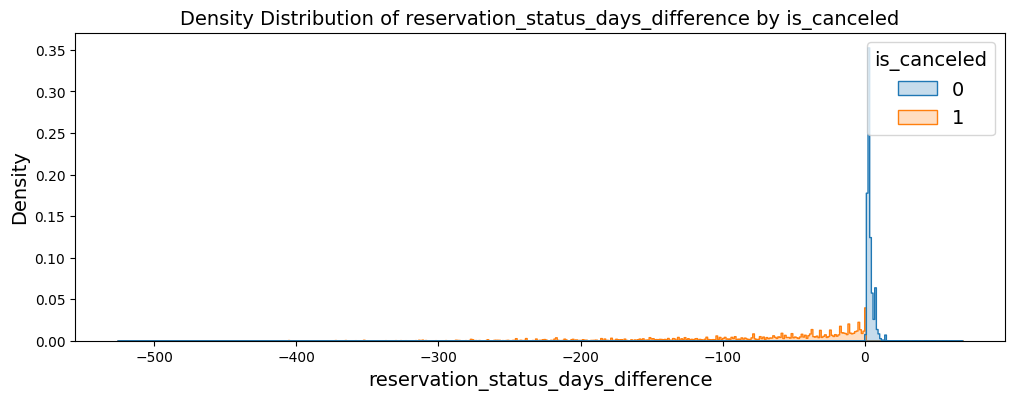

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(data=data, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [ ]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(data[data['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(data[data['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    74460
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    42137
Name: count, dtype: int64


<ipython-input-12-8532931096b8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=item['data'],palette=['darkturquoise', 'royalblue'])
<ipython-input-12-8532931096b8>:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(x='is_canceled', data=item['data'],palette=['darkturquoise', 'royalblue'])
<ipython-input-12-8532931096b8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=item['data'],palette=['darkturquoise', 'royalblue'])
<ipython-input-12-8532931096b8>:16: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(x='is_cancele

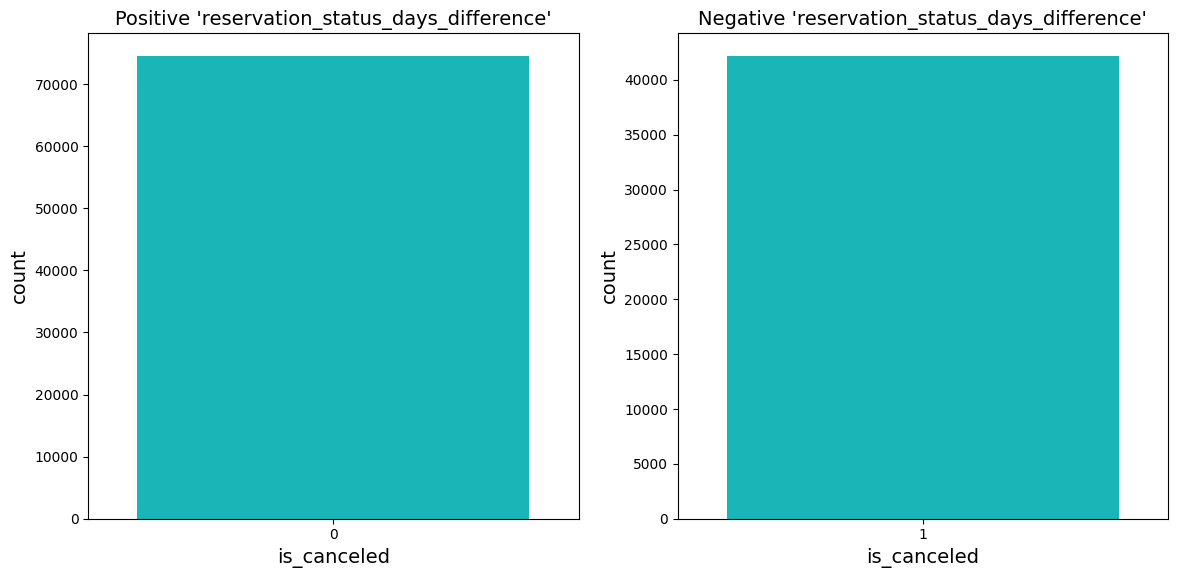

In [ ]:
# Filter data into two DataFrames based on the condition
positive_diff = data[data['reservation_status_days_difference'] > 0]
negative_diff = data[data['reservation_status_days_difference'] < 0]

# Prepare the data for plotting
data_to_plot = [
    {'data': positive_diff, 'title': "Positive 'reservation_status_days_difference'"},
    {'data': negative_diff, 'title': "Negative 'reservation_status_days_difference'"}
]

# Plotting
plt.figure(figsize=(12, 6))

for i, item in enumerate(data_to_plot, start=1):
    plt.subplot(1, 2, i)
    sns.countplot(x='is_canceled', data=item['data'],palette=['darkturquoise', 'royalblue'])
    plt.title(item['title'])

plt.tight_layout()
plt.show()

Bookings with a positive 'reservation_status_days_difference' are not canceled. They represent cases where the booking was used and the status was updated after the stay.

Bookings with a negative 'reservation_status_days_difference' are all canceled, which indicate that the reservation was canceled a certain number of days before the expected arrival.

This shows a clear relationship between the reservation_status_days_difference and the is_canceled feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

Therefore, it is advisable to omit both the reservation_status_date and the reservation_status_days_difference features from the model. The latter was derived from the former, and both lead to data leakage.

# Exploring some more relationships

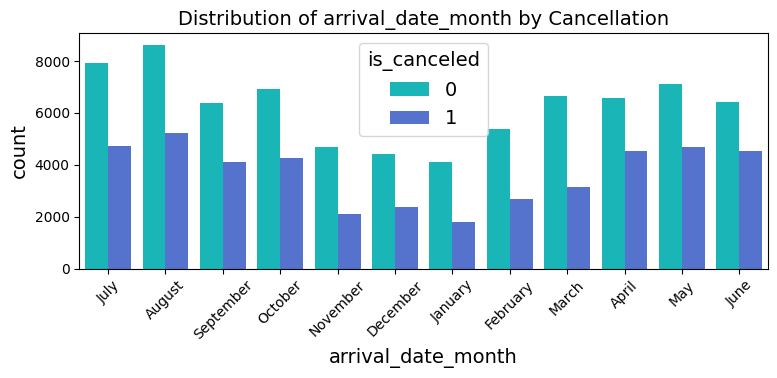

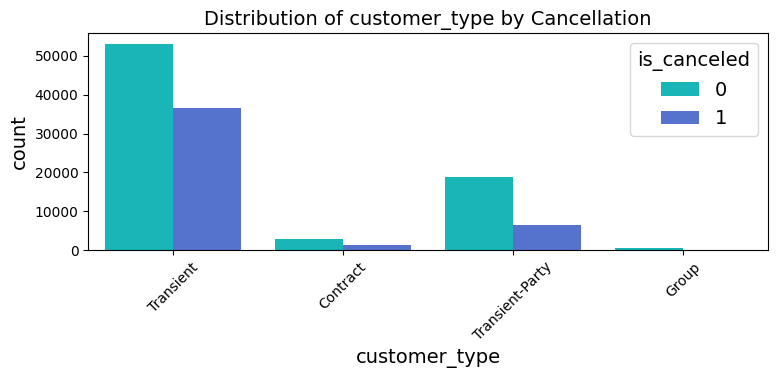

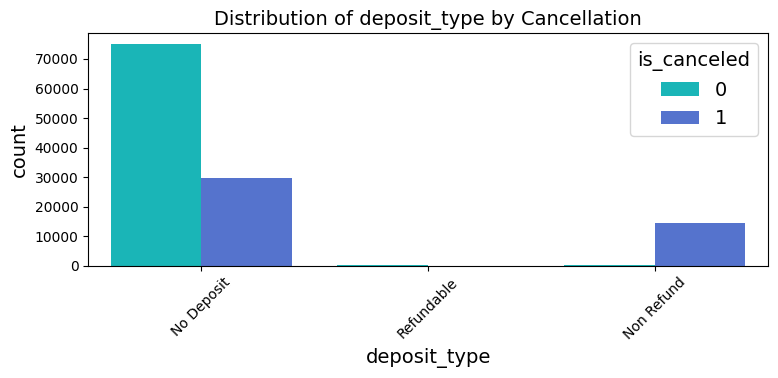

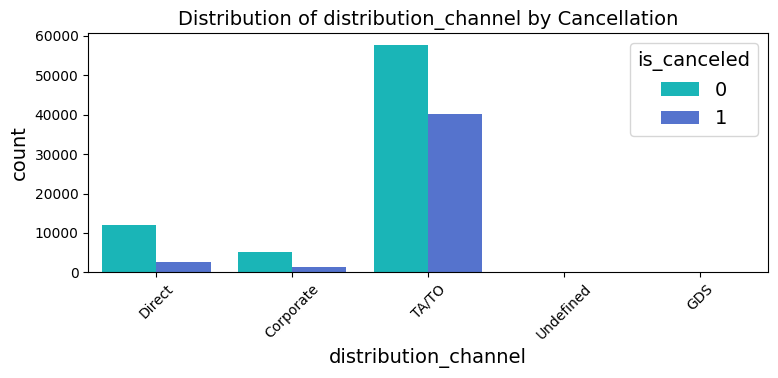

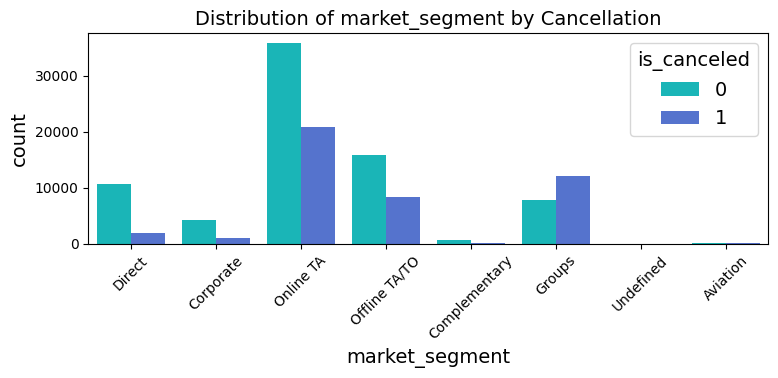

In [ ]:
categorical_columns = ['arrival_date_month', 'customer_type', 'deposit_type','distribution_channel', 'market_segment']

# Plotting
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue="is_canceled", data=data, palette=['darkturquoise', 'royalblue'])
    plt.title(f'Distribution of {column} by Cancellation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


1. Chart 1: Both canceled and not canceled bookings are present in every month.There appears to be some seasonality in the booking data. The summer months (July and August) and spring months (March, April, May) show higher overall booking counts. This could be due to the holiday seasons when more people travel.appears to vary by month. Some months, like April, May, and June, have relatively higher cancellations compared to the total number of bookings, whereas months like September and October have a lower proportion of cancellations.July and August have the highest total count of bookings (both canceled and not canceled), indicating peak travel season during these months.

2. Chart 2: The bar chart provides insights into the count of hotel bookings by customer type, differentiated by cancellation status. Transient customers—the largest segment—have a substantial number of both canceled and non-canceled bookings, indicating high turnover. Contract customers have a lower number of bookings, but a significant portion is non-canceled, suggesting more reliable stays. The Transient-Party segment has a relatively balanced distribution of cancellations, while the Group segment shows the least number of bookings.
3. Chart 3: The bar chart illustrates the relationship between the type of deposit and cancellation status for hotel bookings. The majority of bookings are made with no deposit and have a lower cancellation rate compared to those with non-refundable deposits, which show a relatively high cancellation rate. Bookings made with refundable deposits have the least count. This could indicate that guests are less likely to cancel when they've made a financial commitment, especially if the deposit is non-refundable.
4. Chart 4: The bar chart presents the distribution of hotel bookings by distribution channel. This information could be vital for assessing the effectiveness and reliability of each distribution channel.The TA/TO (Travel Agent/Tour Operator) channel has the highest count of bookings suggesting it's the most utilized channel for making reservations. The Direct and Corporate channels have a lower overall number of bookings, but the Direct channel shows a higher rate of non-cancellations relative to cancellations compared to the Corporate channel.
5. Chart 5: The bar chart shows the count of hotel bookings by market segment, broken down by cancellation status. The Online TA (Travel Agent) segment has the highest overall count of bookings and a significant proportion of these bookings were canceled. The Offline TA/TO segment also has a substantial number of bookings with a relatively high cancellation rate. Direct bookings appear to have a lower cancellation rate compared to the TA/TO segments. Corporate, Complementary, Groups, and Aviation have fewer bookings in comparison, with the Groups segment showing a balanced distribution between canceled and non-canceled bookings. This distribution suggests that the market segment is a considerable factor in the likelihood of cancellations, with online bookings showing a tendency for higher cancellations.

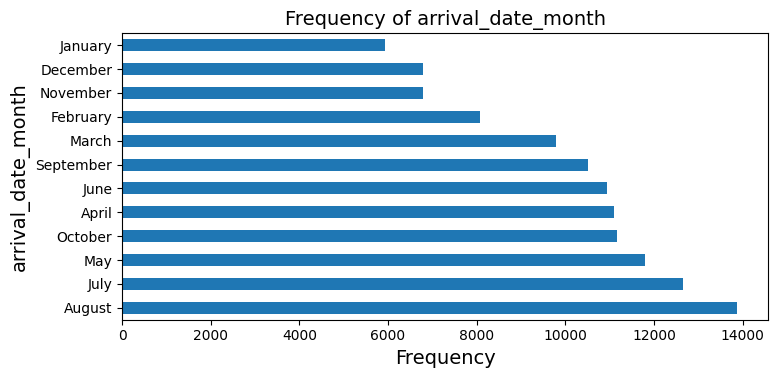

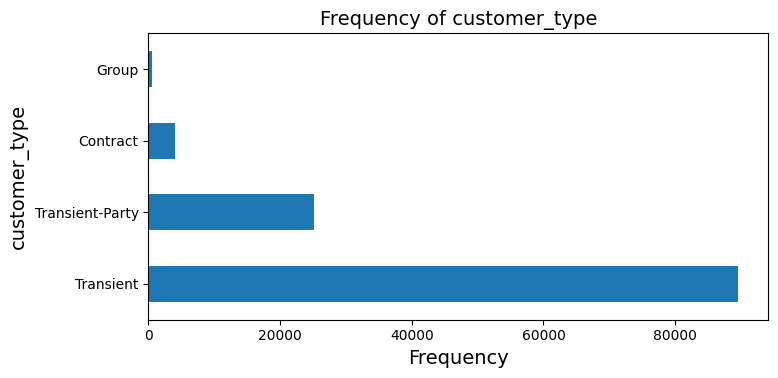

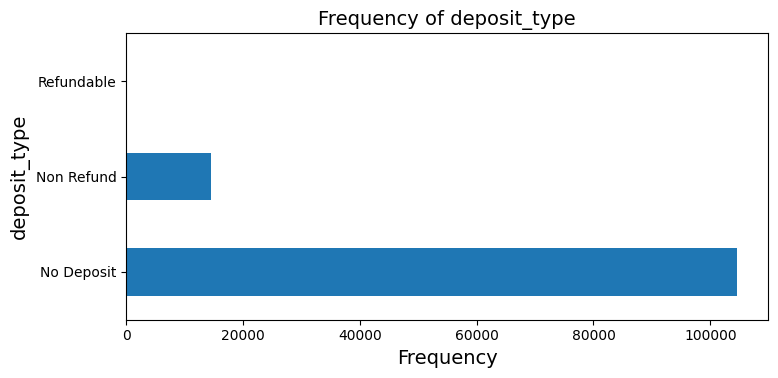

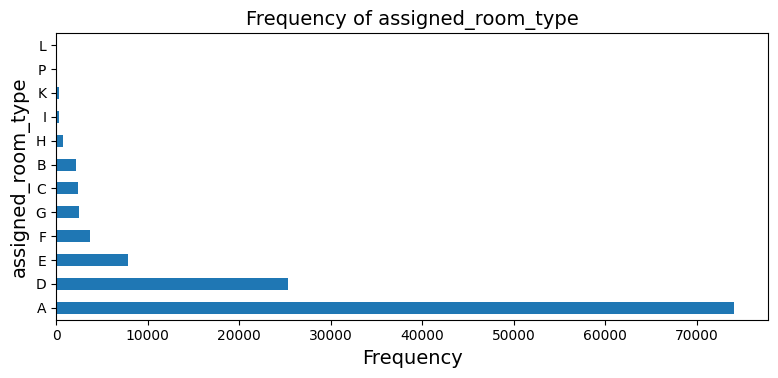

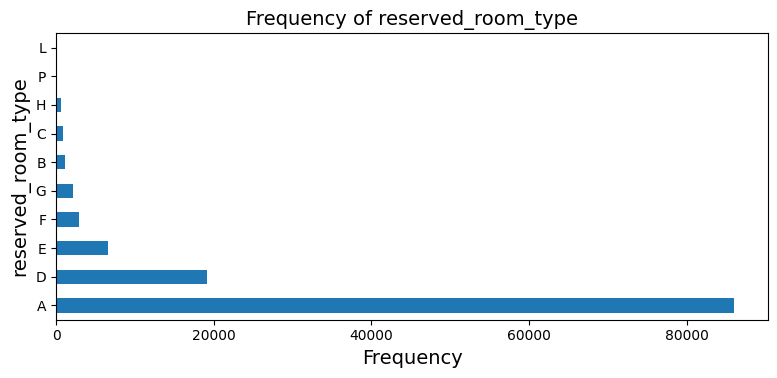

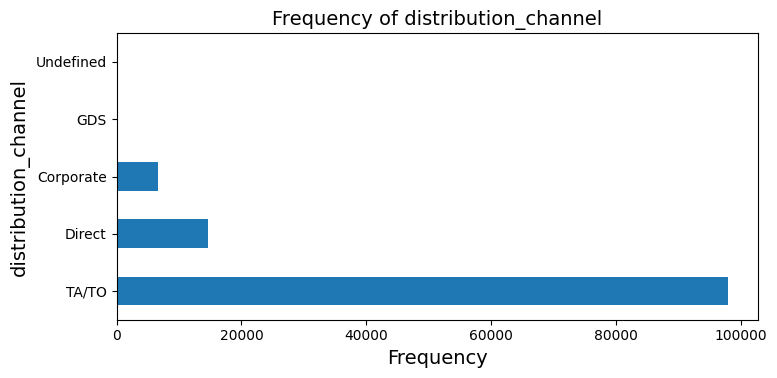

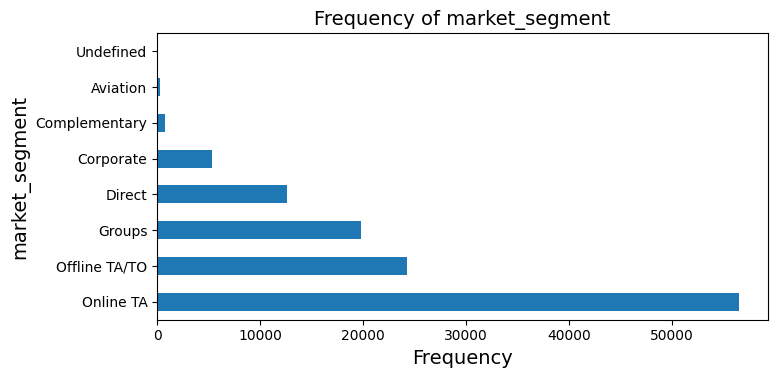

In [ ]:
categorical_columns = ['arrival_date_month', 'customer_type', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
                      'distribution_channel', 'market_segment']

# Plotting
for column in categorical_columns:
    # Calculate frequency of each category
    value_counts = data[column].value_counts()


    # Create horizontal bar chart
    plt.figure(figsize=(8, 4))
    value_counts.plot(kind='barh')  # 'barh' creates a horizontal bar chart
    plt.title(f'Frequency of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.tight_layout()  # Adjust layout to make room for the longer labels
    plt.show()

Insights:

1. The arrival date month chart shows that August is the busiest month for hotel arrivals, followed by July, indicating a peak season during the summer months.

2. The customer type chart reveals that the majority of hotel customers are transient, suggesting that most business comes from individuals or walk-in guests rather than contracted groups or companies.

3. The deposit type chart indicates that most bookings do not require a deposit, which could imply a hotel policy designed for ease of booking or a specific customer preference pattern.

4. The assigned room type chart demonstrates a clear preference or higher availability for certain room types, with 'A' type rooms being the most frequently assigned.

5. The reserved room type chart closely mirrors the assigned room type chart, indicating consistency in room booking and assignment.

6. The distribution channel chart shows that the majority of bookings come through Travel Agents/Tour Operators (TA/TO), highlighting their importance in the hotel booking process.

7. Lastly, the market segment chart emphasizes that the majority of bookings are made through Online Travel Agents (Online TA), which aligns with current trends in the travel industry towards digital booking platforms.

# Top 10 Countries by Customer Count, Cancellations and Non-Cancellations

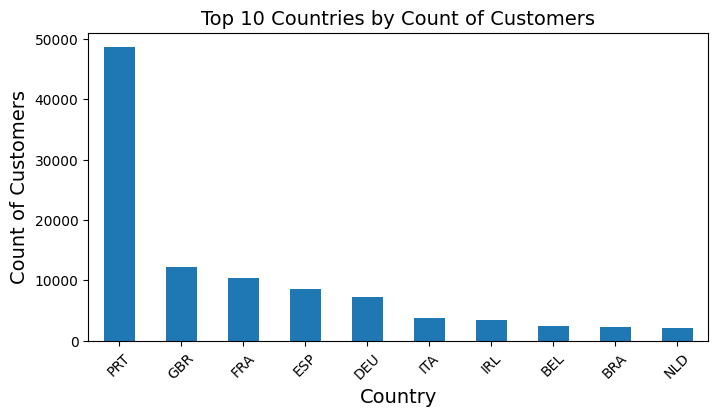

In [ ]:
# Calculate the top 10 countries by count of customers
top_countries = data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Count of Customers')
plt.xlabel('Country')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


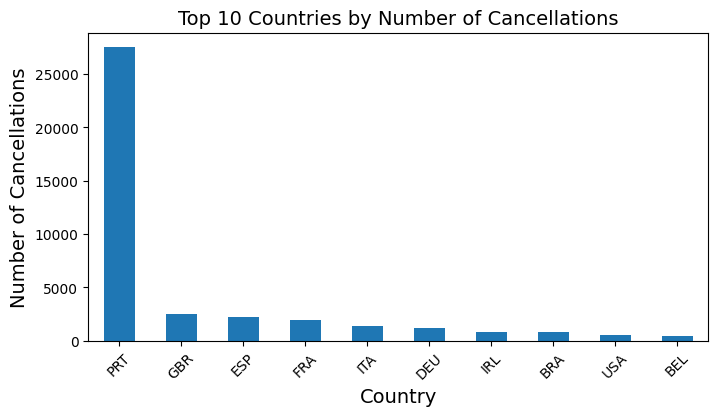

In [ ]:
# Filter the dataset for canceled bookings
canceled_data = data[data['is_canceled'] == 1]

# Count the number of cancellations per country
cancellations_per_country = canceled_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
cancellations_per_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


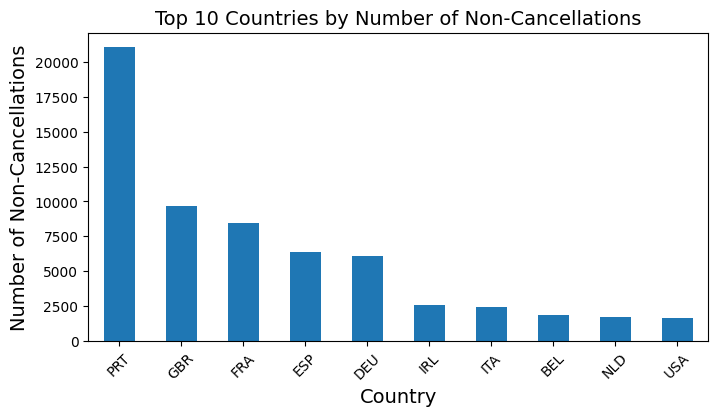

In [ ]:
# Filter the dataset for canceled bookings
canceled_data = data[data['is_canceled'] == 0]

# Count the number of cancellations per country
cancellations_per_country = canceled_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 4))
cancellations_per_country.plot(kind='bar')
plt.title('Top 10 Countries by Number of Non-Cancellations')
plt.xlabel('Country')
plt.ylabel('Number of Non-Cancellations')
plt.xticks(rotation=45)
plt.show()

The three bar charts represent the top 10 countries by count of customers, number of cancellations, and number of non-cancellations at a hotel.

The country with the highest number of customers and non-cancellations is Portugal (PRT), followed by Great Britain (GBR), indicating a strong customer base from these countries.
The cancellation chart also shows Portugal leading by a significant margin, suggesting either a higher booking volume that naturally leads to more cancellations or a potential issue that leads to a higher cancellation rate.
The presence of certain countries like the United States (USA) in the top 10 for cancellations but not for non-cancellations could indicate different booking behaviors or economic factors affecting travel decisions.

Overall, there's a clear pattern that countries with higher booking counts also have higher cancellations.

# PART 2: CLASSIFICATION MODEL TO PREDICT CANCELLATIONS

## Additional Imports for Classification Model

In [ ]:
import numpy as np
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import *
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


## Preprocessing

In [ ]:
# Load the data
df = pd.read_csv("/content/drive/MyDrive/hotel_booking.csv")

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

 Reservation Status, Reservation Status Date are Updated after is cancelled , so it is dropped


In [ ]:
# Drop the 'reservation_status_date' and 'reservation_status_days_difference' columns
df = df.drop(['reservation_status_date', 'reservation_status','assigned_room_type'], axis=1)

 Removing Personal identification information

In [ ]:
# check columns for percentage of missing values
missing = df.isnull().mean()*100
missing[missing > 0]


children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [ ]:
# Distinct agent and company values
print(df['agent'].nunique())
print(df['company'].nunique())

333
352


Since the number of agents and company is very high and there are many missing values, we can omit these columns

In [ ]:
# Drop the 'agent' and 'company' columns
df = df.drop(['agent', 'company'], axis=1)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')

In [ ]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

## Feature Engineering

In [ ]:
df.sort_values(by=['name', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

In [ ]:
#Create Number of bookings column counting the number of bookings by name prior to arrival year, month and day

df['num_bookings'] = df.groupby('name').cumcount()


In [ ]:
# Arrival date year does not make sense for the model we want to build, so we drop it
df = df.drop(['arrival_date_year'], axis=1)

In [ ]:
# Keep country names with more than 1000 bookings rest as 'Other'
country_counts = df['country'].value_counts()
df['country'] = np.where(df['country'].isin(country_counts.index[country_counts > 1000]), df['country'], 'Other')




Drop PII like name, email, phone number and credit card

In [ ]:
df = df.drop(['name', 'email','phone-number', 'credit_card'], axis=1)

## Test Train and Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
test, val = train_test_split(test, test_size=0.5, random_state=42)

In [ ]:
print(len(train))
print(len(test))
print(len(val))

83573
17908
17909


In [ ]:
# Check for null values
train.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          2
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
num_bookings                      0
dtype: int64

In [ ]:
#Replace missing values with the 0 for the children column
train['children'] = train['children'].fillna(0)

## Categorical Encoding

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83573 entries, 51828 to 68492
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83573 non-null  object 
 1   is_canceled                     83573 non-null  int64  
 2   lead_time                       83573 non-null  int64  
 3   arrival_date_month              83573 non-null  object 
 4   arrival_date_week_number        83573 non-null  int64  
 5   arrival_date_day_of_month       83573 non-null  int64  
 6   stays_in_weekend_nights         83573 non-null  int64  
 7   stays_in_week_nights            83573 non-null  int64  
 8   adults                          83573 non-null  int64  
 9   children                        83573 non-null  float64
 10  babies                          83573 non-null  int64  
 11  meal                            83573 non-null  object 
 12  country                         8

In [ ]:
# Using get_dummies to convert categorical columns to numerical columns
train = pd.get_dummies(train, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

## Outlier Identification and Treatment

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74]),
 [Text(1, 0, 'is_canceled'),
  Text(2, 0, 'lead_time'),
  Text(3, 0, 'arrival_date_week_number'),
  Text(4, 0, 'arrival_date_day_of_month'),
  Text(5, 0, 'stays_in_weekend_nights'),
  Text(6, 0, 'stays_in_week_nights'),
  Text(7, 0, 'adults'),
  Text(8, 0, 'children'),
  Text(9, 0, 'babies'),
  Text(10, 0, 'is_repeated_guest'),
  Text(11, 0, 'previous_cancellations'),
  Text(12, 0, 'previous_bookings_not_canceled'),
  Text(13, 0, 'booking_changes'),
  Text(14, 0, 'days_in_waiting_list'),
  Text(15, 0, 'adr'),
  Text(16, 0, 'required_car_parking_spaces'),
  Text(17, 0, 'total_of_special_requests'),
  Text(18, 0, 'num_bookings'),
  Text(19, 0, 'hotel_Resor

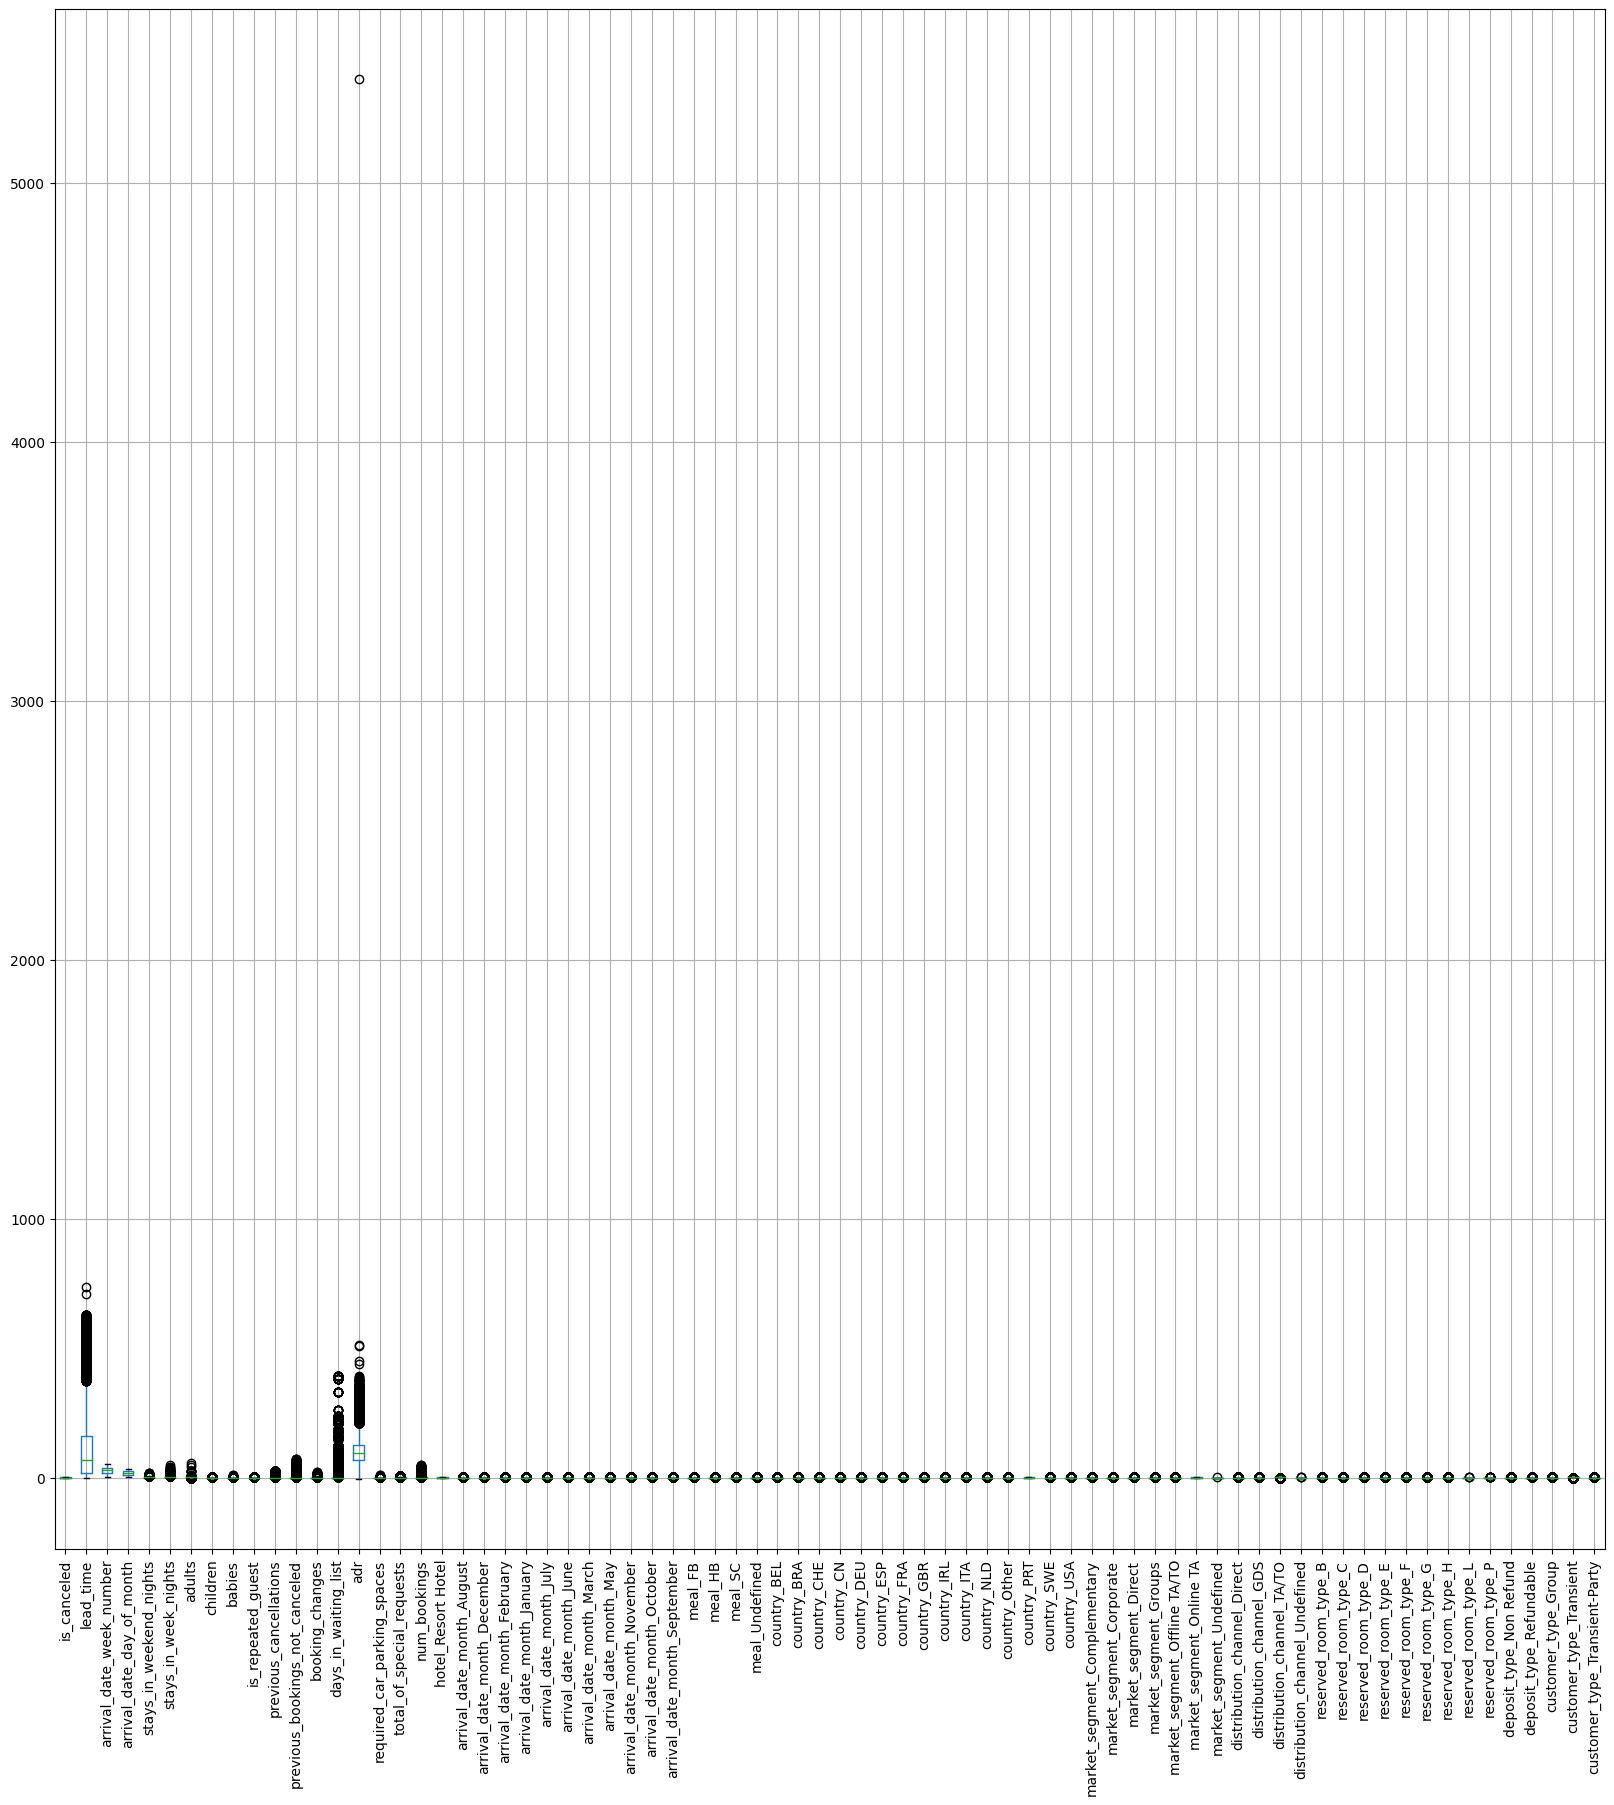

In [ ]:
#Plot box plots for numerical columns to check for outliers
plt.figure(figsize=(20,20))
train.boxplot()
plt.xticks(rotation=90)


In [ ]:
# Use isolation forest to remove outliers
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train)
score = iforest.decision_function(train)

from numpy import where
anom_index = where(pred== -1)
values = train.iloc[anom_index]
values



,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
8390,1,14,40,26,1,2,2,2.0,0,0,...,False,True,False,False,False,False,False,False,True,False
4277,1,45,10,1,0,5,2,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
25035,0,13,24,8,0,4,2,1.0,1,0,...,False,False,False,False,False,False,False,False,True,False
24991,0,143,23,4,2,5,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1331,0,58,35,24,1,4,2,2.0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39827,0,228,34,23,2,5,2,0.0,1,0,...,False,False,False,False,False,False,False,False,False,True
14038,0,126,28,5,19,50,1,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
12035,1,234,23,9,2,5,3,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
8696,0,337,42,9,2,5,2,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
#Remove outliers
train = train.drop(values.index)


# Target Vs Features

In [ ]:
# Split the data into features and target
X_train = train.drop('is_canceled', axis=1)
y_train = train['is_canceled']

# Feature Selection

In [ ]:

randomforest = RandomForestClassifier(random_state=42)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")[:10]

,predictor,feature importance
54,market_segment_Undefined,0.000012
58,distribution_channel_Undefined,0.000018
66,reserved_room_type_L,0.000037
69,deposit_type_Refundable,0.000135
67,reserved_room_type_P,0.000181
56,distribution_channel_GDS,0.000230
70,customer_type_Group,0.000233
48,market_segment_Complementary,0.000416
65,reserved_room_type_H,0.000594
7,babies,0.000801


In [ ]:
#Drop columns with low feature importance 'reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined'
X_train = X_train.drop(['reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined'], axis=1)


In [ ]:
X_train.shape

(81901, 70)

## Standardize the Data

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
X_train_std.shape

(81901, 70)

## Preprocess Validation Data

In [ ]:
# Check for null values
val.isnull().sum()
#Replace missing values with the 0 for the children column
val['children'] = val['children'].fillna(0)

# Using get_dummies to convert categorical columns to numerical columns
val = pd.get_dummies(val, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

# Split the data into features and target
X_val = val.drop('is_canceled', axis=1)
y_val = val['is_canceled']

#Drop columns with low feature importance 'reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined' if these columns exist
if 'reserved_room_type_L' in X_val.columns:
    X_val = X_val.drop(['reserved_room_type_L'], axis=1)
if 'market_segment_Undefined' in X_val.columns:
    X_val = X_val.drop(['market_segment_Undefined'], axis=1)
if 'distribution_channel_Undefined' in X_val.columns:
    X_val = X_val.drop(['distribution_channel_Undefined'], axis=1)

#standardize the data
sc = StandardScaler()
X_val = sc.fit_transform(X_val)





In [ ]:
X_val.shape

(17909, 70)

## Base Model Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_std, y_train)

DummyClassifier()

In [ ]:
#Accuracy of the dummy classifier
dummy_clf.score(X_val, y_val)


0.6304651292646155

In [ ]:
print(metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))

[[11291     0]
 [ 6618     0]]


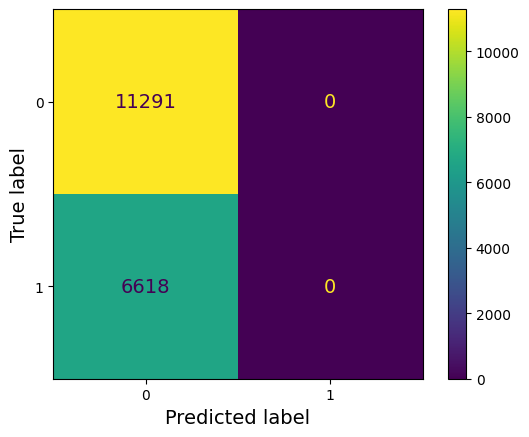

In [ ]:
#plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))
disp.plot()


In [ ]:
print(metrics.classification_report(dummy_clf.predict(X_val), y_val, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.630     0.773     17909
           1      0.000     0.000     0.000         0

    accuracy                          0.630     17909
   macro avg      0.500     0.315     0.387     17909
weighted avg      1.000     0.630     0.773     17909



## Evaluation Metrics

In [ ]:
#ROC Curve

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
# PR Curve
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [ ]:
#Classification Score
def clf_score(clf, X_train, y_train, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        #print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_train, clf.predict(X_train)),cmap='Blues')))
        print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay.from_predictions(y_train, clf.predict(X_train), cmap='Blues')))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))

        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)

        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)

        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        #print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_val, clf.predict(X_val)),cmap='Blues')))
        print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay.from_predictions(y_val, clf.predict(X_val), cmap='Blues')))
        print("End of validation Result\n")

def clf_score_test(clf, X_test, y_test):
    print("Validation Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))

    precision, recall, _ = precision_recall_curve(y_test, clf.predict(X_test))
    average_precision = average_precision_score(y_test, clf.predict(X_test))
    plot_pr_curve(precision, recall, average_precision)

    fpr, tpr, _ = roc_curve(y_test, clf.predict(X_test))
    roc_auc = roc_auc_score(y_test, clf.predict(X_test))
    print("roc auc score: {}\n".format(roc_auc))
    plot_roc_curve(fpr, tpr, roc_auc)

    print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
    #print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_val, clf.predict(X_val)),cmap='Blues')))
    print("Confusion Matrix: \n {}\n".format(ConfusionMatrixDisplay.from_predictions(y_test, clf.predict(X_test), cmap='Blues')))
    print("End of validation Result\n")


## Dealing with Imbalanced Data

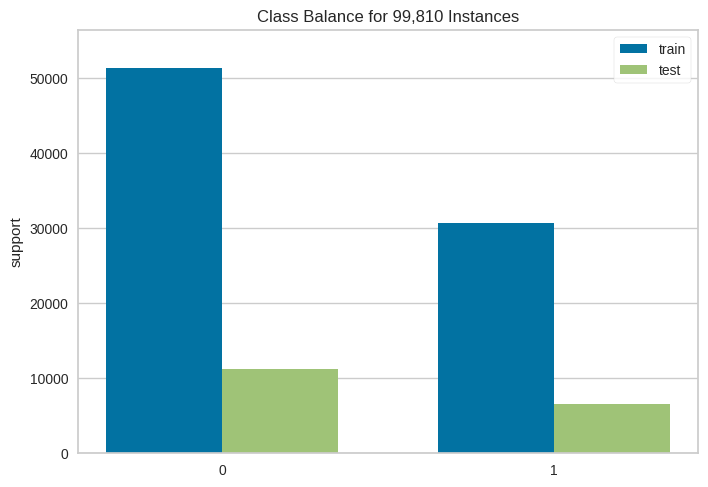

<Axes: title={'center': 'Class Balance for 99,810 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train, y_val)        # Fit the data to the visualizer
visualizer.show()

We can see an imbalanced dataset, O has more instances than 1. This makes sense due to the nature of the classification task that there would be more non cancelled bookings than cancelled ones

## Oversampling

In [ ]:
print('Before OverSampling, the shape of X: {}'.format(X_train_std.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X: (81901, 70)
Before OverSampling, the shape of y: (81901,) 

Before OverSampling, counts of label '1': 30620
Before OverSampling, counts of label '0': 51281


In [ ]:
#Use RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_std, y_train)

pd.Series(y_train_ros).value_counts()


is_canceled
0    51281
1    51281
Name: count, dtype: int64

In [ ]:
print('After OverSampling, the shape of X: {}'.format(X_train_ros.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_train_ros.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, the shape of X: (102562, 70)
After OverSampling, the shape of y: (102562,) 

After OverSampling, counts of label '1': 51281
After OverSampling, counts of label '0': 51281


In [ ]:
X_train_ros

array([[ 1.97940943, -0.3804681 ,  1.15660889, ..., -0.0625314 ,
        -1.74989903,  1.95222863],
       [-0.93329484, -1.48325773, -0.32399116, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       [ 0.95249446,  0.86936015,  0.81493195, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       ...,
       [-0.0744205 ,  1.38399531, -1.12123735, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       [-0.67189831, -1.40973843,  0.47325502, ..., -0.0625314 ,
         0.57146154, -0.51223509],
       [ 1.22322659, -0.01287156, -1.12123735, ..., -0.0625314 ,
         0.57146154, -0.51223509]])

In [ ]:
#Using SMOTE to handle imbalanced data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

pd.Series(y_train_smote).value_counts()

print('After OverSampling, the shape of X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))


After OverSampling, the shape of X: (102562, 70)
After OverSampling, the shape of y: (102562,) 

After OverSampling, counts of label '1': 51281
After OverSampling, counts of label '0': 51281


## Converting to Dataframe

In [ ]:
#converting to dataframe
train_X = X_train
cols = list(train_X)

X_train_ros=pd.DataFrame(X_train_ros)
X_train_ros.columns=cols
#Renaming column name of Target variable
y_train_ros=pd.DataFrame(y_train_ros)
y_train_ros.columns = ['is_canceled']
scaled_train_df = pd.concat([X_train_ros,y_train_ros], axis=1)
scaled_train_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_canceled
0,1.979409,-0.380468,1.156609,-0.937594,0.296420,-1.523381,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,-1.749899,1.952229,0
1,-0.933295,-1.483258,-0.323991,0.090810,-0.802464,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,0
2,0.952494,0.869360,0.814932,1.119213,0.296420,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
3,-0.625220,-0.086391,0.587147,-0.937594,0.296420,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,0
4,0.896481,1.236957,0.928824,0.090810,0.296420,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,-0.662563,-1.924374,-1.349022,-0.937594,0.845862,-1.523381,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
102558,0.392359,0.060648,-1.349022,0.090810,1.395304,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
102559,-0.074421,1.383995,-1.121237,1.119213,1.395304,0.254906,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,-0.375691,-0.034435,-0.062531,0.571462,-0.512235,1
102560,-0.671898,-1.409738,0.473255,0.090810,-0.802464,-1.523381,-0.252469,-0.070839,-0.172851,-0.104989,...,-0.153777,-0.128284,-0.068993,-0.010483,2.661765,-0.034435,-0.062531,0.571462,-0.512235,1


<Axes: xlabel='is_canceled', ylabel='count'>

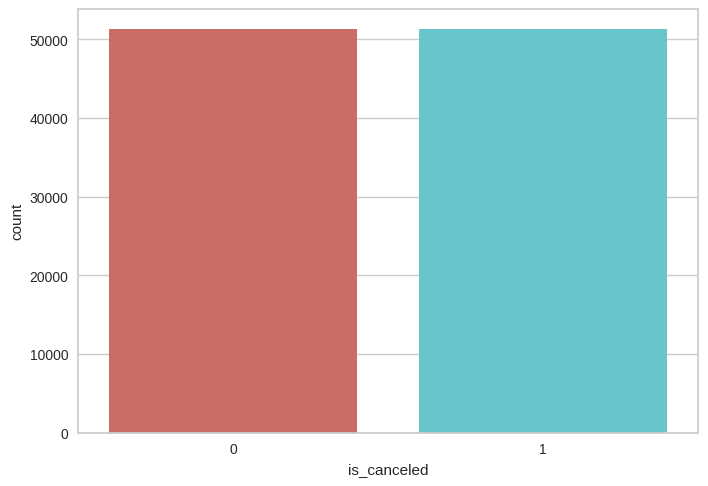

In [ ]:
#Plot value counts of the target variable
sns.countplot(x='is_canceled', data=scaled_train_df, palette='hls')

The training data is now balanced

## Model Building

## 1. Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_ros, y_train_ros)

DummyClassifier()

Validation Result:

accuracy score: 0.6305



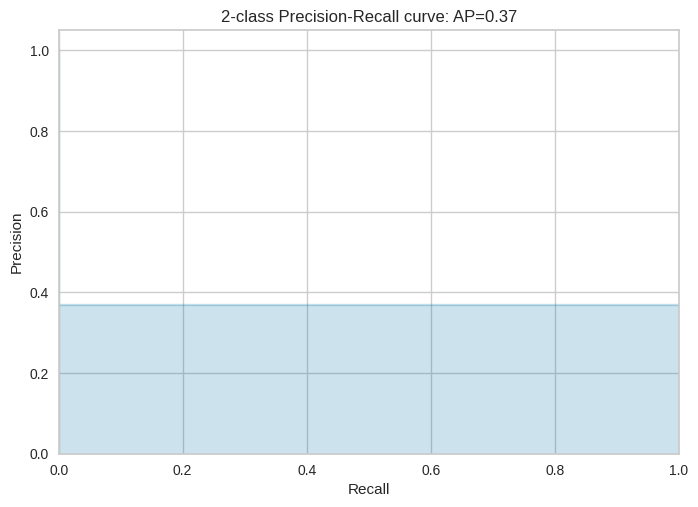

roc auc score: 0.5



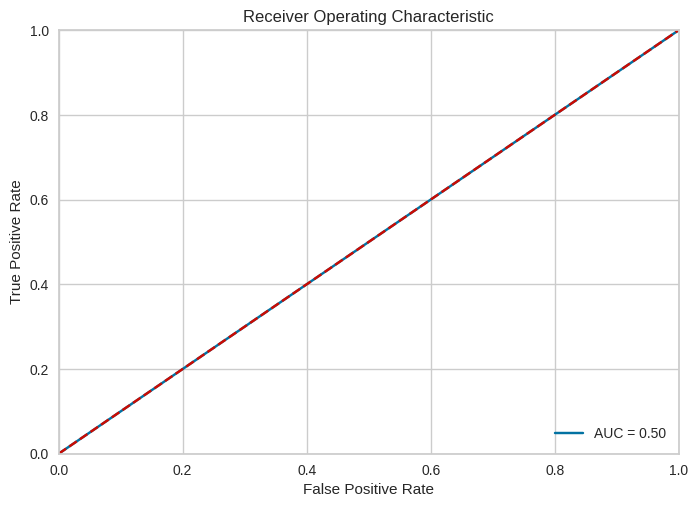

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77     11291
           1       0.00      0.00      0.00      6618

    accuracy                           0.63     17909
   macro avg       0.32      0.50      0.39     17909
weighted avg       0.40      0.63      0.49     17909


Confusion Matrix: 

End of validation Result



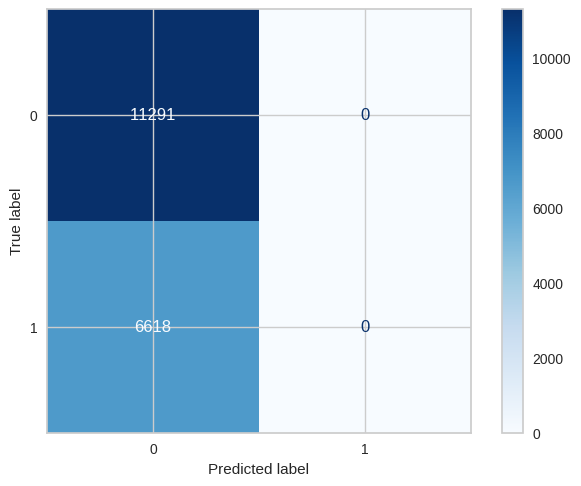

In [ ]:
clf_score(clf_dummy, X_val, y_val, train=False)

## Logistic Regression

Validation Result:

accuracy score: 0.7982



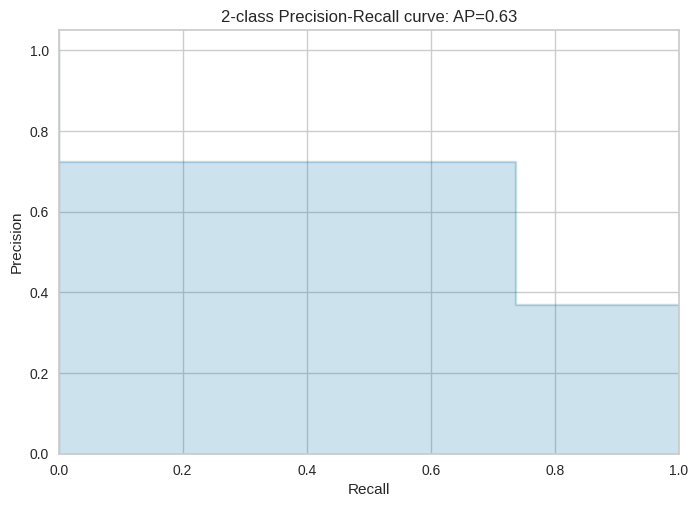

roc auc score: 0.785741505943525



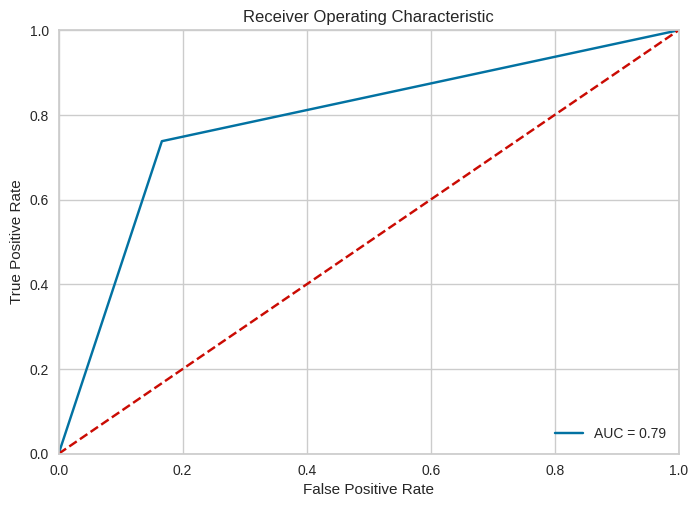

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84     11291
           1       0.72      0.74      0.73      6618

    accuracy                           0.80     17909
   macro avg       0.78      0.79      0.78     17909
weighted avg       0.80      0.80      0.80     17909


Confusion Matrix: 

End of validation Result



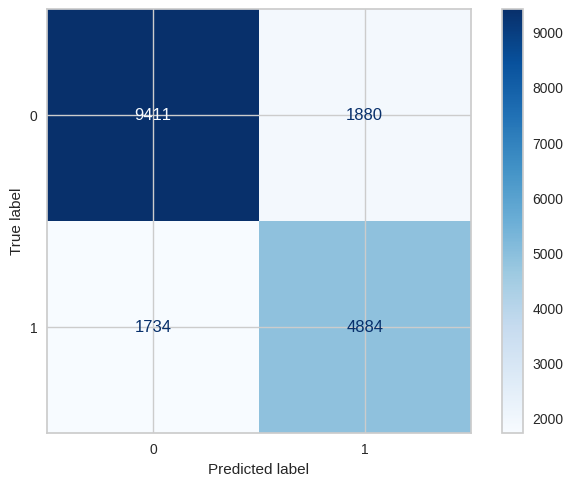

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_log_reg.fit(X_train_ros, y_train_ros)

clf_score(clf_log_reg, X_val, y_val, train=False)

## Random Forest

Validation Result:

accuracy score: 0.8784



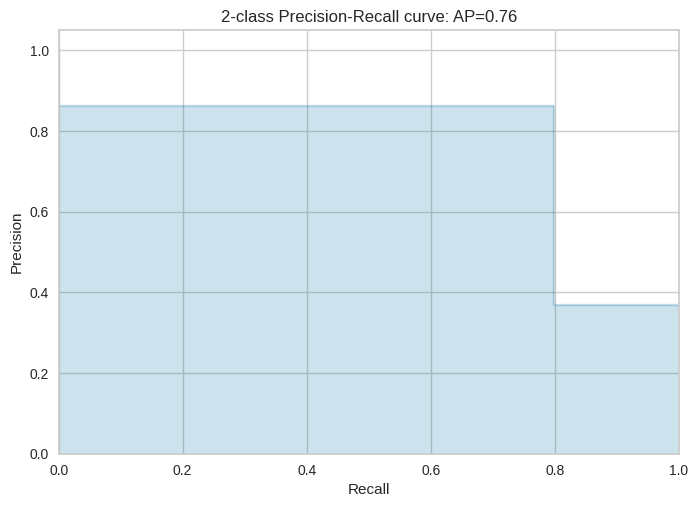

roc auc score: 0.8619644376403685



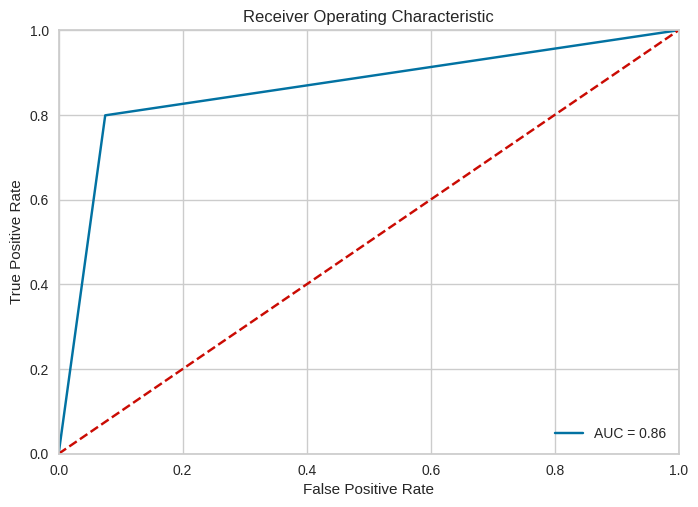

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     11291
           1       0.86      0.80      0.83      6618

    accuracy                           0.88     17909
   macro avg       0.87      0.86      0.87     17909
weighted avg       0.88      0.88      0.88     17909


Confusion Matrix: 

End of validation Result



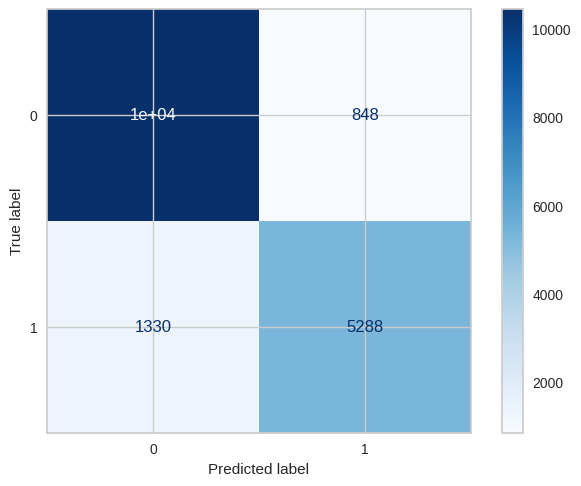

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_ros, y_train_ros)

clf_score(clf_rf, X_val, y_val,train=False)

## XGBOOST

Validation Result:

accuracy score: 0.7330



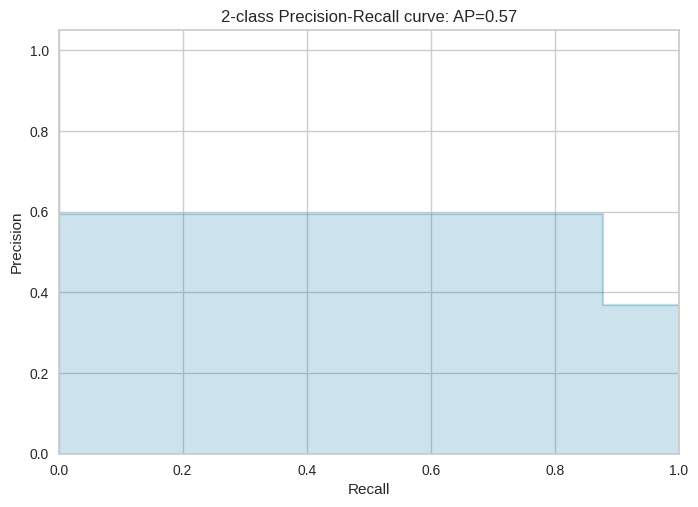

roc auc score: 0.7630490486851064



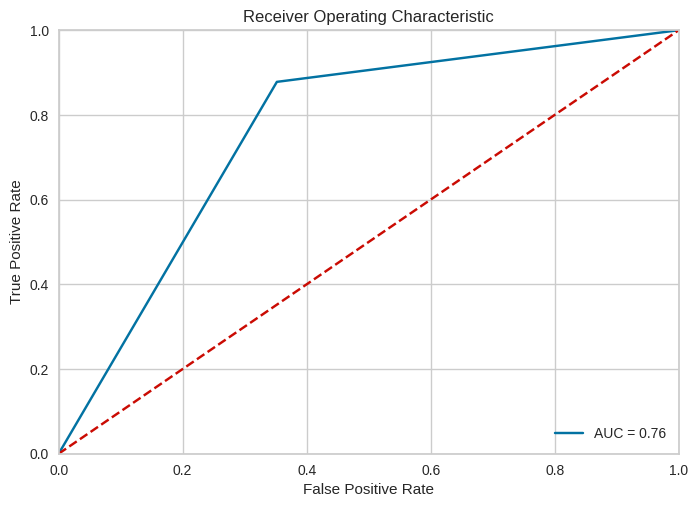

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.65      0.75     11291
           1       0.59      0.88      0.71      6618

    accuracy                           0.73     17909
   macro avg       0.75      0.76      0.73     17909
weighted avg       0.79      0.73      0.74     17909


Confusion Matrix: 

End of validation Result



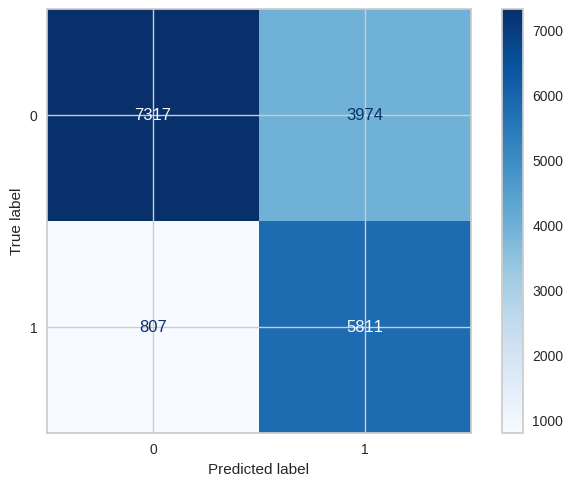

In [ ]:
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_xgb.fit(X_train_smote, y_train_smote)

clf_score(clf_xgb, X_val, y_val, train=False)

## CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.8 MB/s eta 0:00:00
0:	learn: 0.5406882	total: 83.5ms	remaining: 83.5ms
1:	learn: 0.4676840	total: 125ms	remaining: 0us
proba =  [[0.76119163 0.23880837]
 [0.49938852 0.50061148]
 [0.00172335 0.99827665]
 ...
 [0.76119163 0.23880837]
 [0.93215091 0.06784909]
 [0.93215091 0.06784909]]
Validation Result:

accuracy score: 0.6847



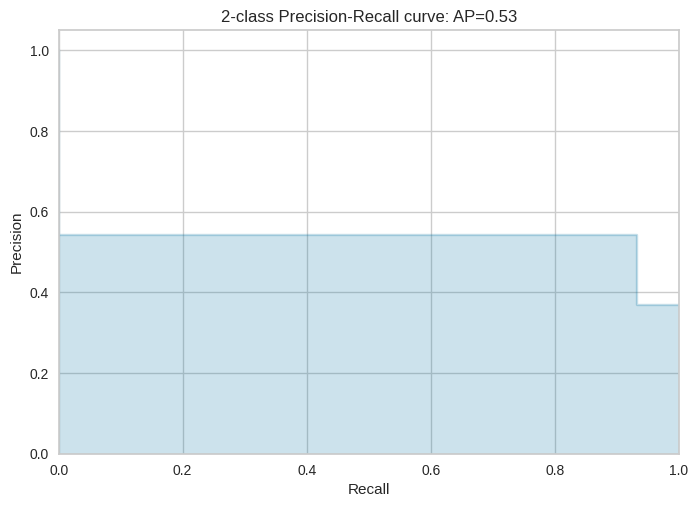

roc auc score: 0.7361259267758703



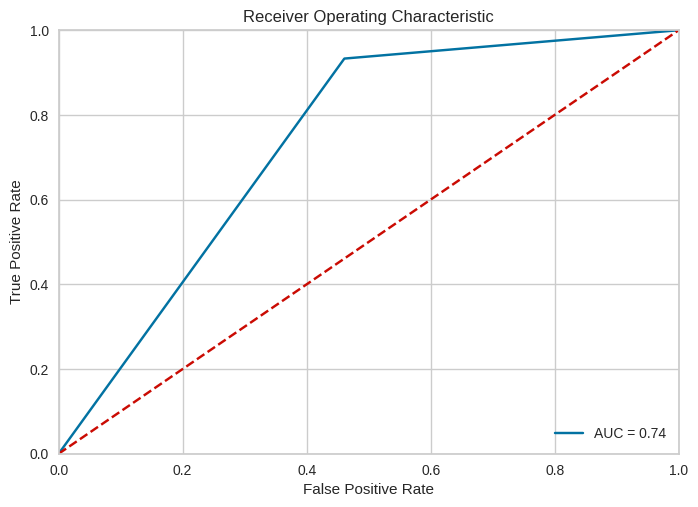

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.54      0.68     11291
           1       0.54      0.93      0.69      6618

    accuracy                           0.68     17909
   macro avg       0.74      0.74      0.68     17909
weighted avg       0.79      0.68      0.68     17909


Confusion Matrix: 

End of validation Result



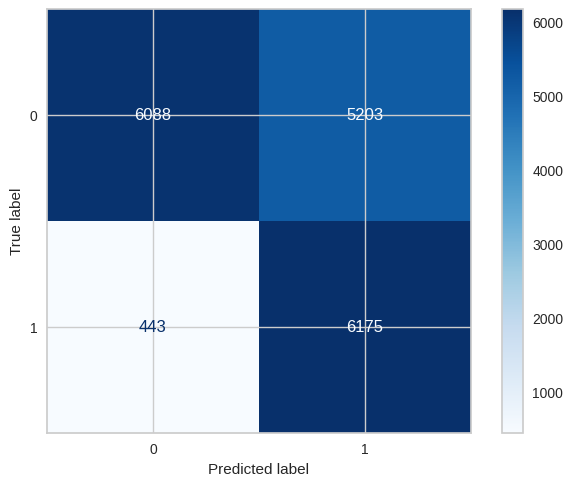

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

clf_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True)
# train the model
clf_cat_boost.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_cat_boost.predict(X_val)
preds_proba = clf_cat_boost.predict_proba(X_val)
#print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_cat_boost, X_val, y_val,  train=False)

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 51281, number of negative: 51281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 102562, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
proba =  [[7.06660476e-01 2.93339524e-01]
 [6.83041131e-02 9.31695887e-01]
 [6.92915025e-04 9.99307085e-01]
 ...
 [7.87019392e-01 2.12980608e-01]
 [9.80471718e-01 1.95282819e-02]
 [9.87888302e-01 1.21116979e-02]]
Validation Result:

accuracy score: 0.8516



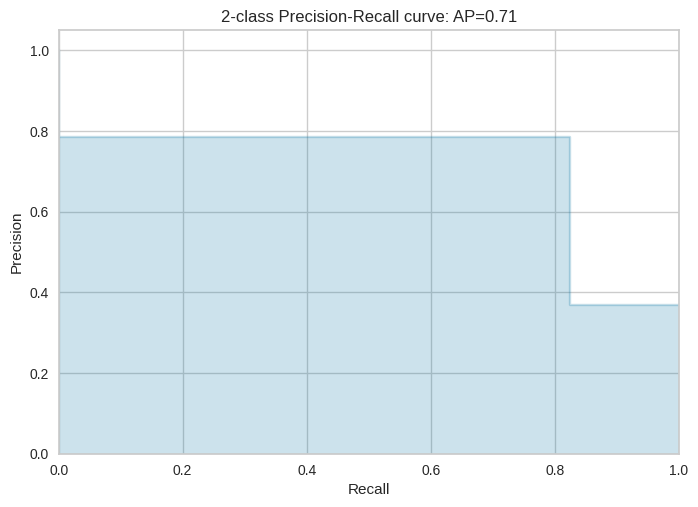

roc auc score: 0.8458991359624756



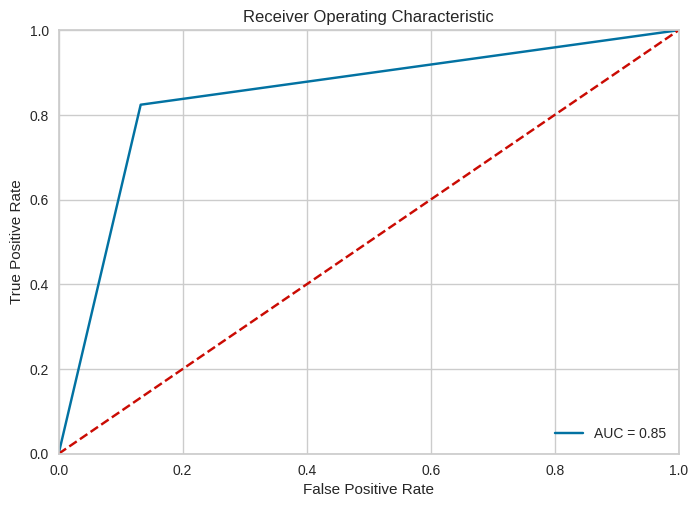

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     11291
           1       0.78      0.82      0.80      6618

    accuracy                           0.85     17909
   macro avg       0.84      0.85      0.84     17909
weighted avg       0.85      0.85      0.85     17909


Confusion Matrix: 

End of validation Result



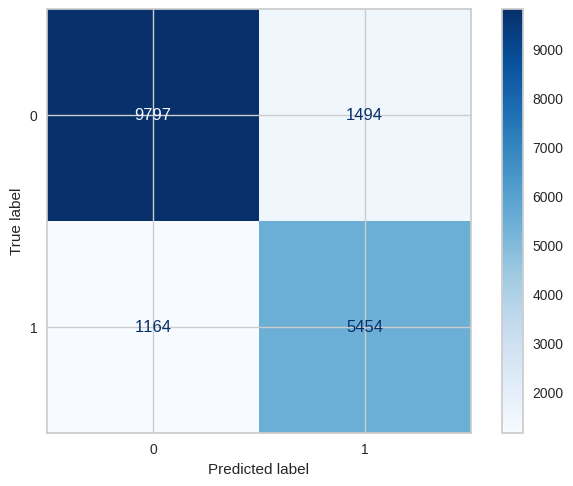

In [ ]:
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(random_state=42)
clf_lgbm.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_lgbm.predict(X_val)
preds_proba = clf_lgbm.predict_proba(X_val)
#print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_lgbm, X_val, y_val,  train=False)

# Hyperparameter Tuning

### Use best hyperparameters with RF

In [ ]:
y_train_ros = y_train_ros.sample(n=50)
X_train_ros = X_train_ros.sample(n=50)

clf_rf_best = RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 1,
        "n_estimators": 200,
        "random_state": 42,
    })
clf_rf_best.fit(X_train_ros, y_train_ros)
print("Accuracy score of the best model: ", accuracy_score(y_val, clf_rf_best.predict(X_val)))
print("\nROC-AUC score of the best model: ", roc_auc_score(y_val, clf_rf_best.predict(X_val)))

Accuracy score of the best model:  0.5177285163884081

ROC-AUC score of the best model:  0.4516167384228846


# Model Selection (using validation set)

| Sl No | Model               | Default Model Accuracy | Default Model ROC-AUC | Fine-tuned Model Accuracy | Fine-tuned Model ROC-AUC |
|:-----:| ------------------- |:----------------------:|:---------------------:|:-------------------------:|:------------------------:|
| 1     | DummyClassifier     |          0.631         |         0.500         |                           |                          |
| 2     | LogisticRegression  |          0.798         |         0.786         |                           |                          |
| 3     | KNN                 |          0.812         |         0.796         |                           |                          |
| 4     | RandomForest        |          0.878         |         0.862         |           0.880           |          0.865           |
| 5     | XGBoost             |          0.733         |         0.763         |           0.769           |          0.785           |
| 6     | AdaBoost            |          0.812         |         0.801         |           0.816           |          0.794           |
| 7     | CatBoost            |          0.685         |         0.736         |           0.850           |          0.845           |
| 8     | LightGBM            |          0.852         |         0.846         |           0.859           |          0.854           |
| 9     | Stacked Model       |                        |                       |           0.876           |          0.852           |


Upon evaluating the performance metrics of various models, we have decided to proceed with the fine-tuned Random Forest model as the preferred choice for next steps, including model interpretation, explainability, and serialization. This model has the highest accuracy of 0.880 and a ROC-AUC score of 0.865 post fine-tuning, suggesting that this model has strong predictive accuracy and the ability to effectively differentiate between the target classes.

## Preprocessing for Test set

In [ ]:
# Check for null values
test.isnull().sum()
#Replace missing values with the 0 for the children column
test['children'] = test['children'].fillna(0)

# Using get_dummies to convert categorical columns to numerical columns
test = pd.get_dummies(test, columns=['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type'], drop_first=True)

# Split the data into features and target
X_test = test.drop('is_canceled', axis=1)
y_test = test['is_canceled']

#Drop columns with low feature importance 'reserved_room_type_L','market_segment_Undefined','distribution_channel_Undefined' if these columns exist
if 'reserved_room_type_L' in X_test.columns:
    X_test = X_test.drop(['reserved_room_type_L'], axis=1)
if 'market_segment_Undefined' in X_test.columns:
    X_test = X_test.drop(['market_segment_Undefined'], axis=1)
if 'distribution_channel_Undefined' in X_test.columns:
    X_test = X_test.drop(['distribution_channel_Undefined'], axis=1)

#standardize the data
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

# Model Interpretation: Feature Importance

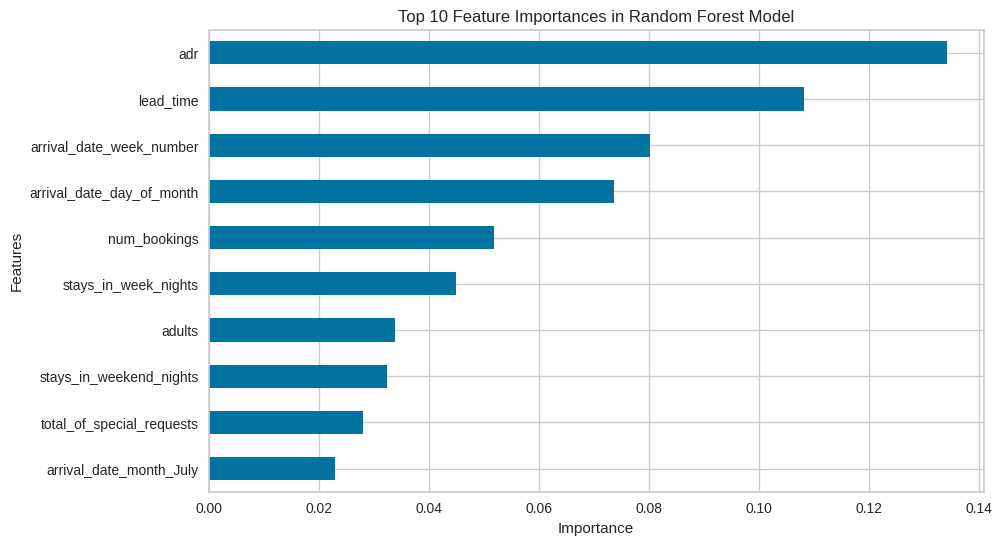

In [ ]:
feature_importances = clf_rf_best.feature_importances_
features = pd.Series(feature_importances, index=X_train_ros.columns).sort_values(ascending=False)
top_features = features[:10]

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

## Interpretation of SHAP Plot

1. Nationality Impact: Bookings from Portugal ('country_PRT') show a pronounced positive correlation with cancellation probability. This suggests that the nationality of the guest can be a strong predictor of cancellation, possibly reflecting specific market behavior or economic factors.

2. Deposit Policy: The 'deposit_type_Non Refund' feature has a substantial positive impact on the likelihood of cancellations. This could indicate that when customers commit to a non-refundable deposit, they might be more prone to cancel, perhaps due to the psychology of sunk cost or other underlying factors.

3. Special Requests: A lower number of 'total_of_special_requests' is associated with a higher chance of cancellation. This aligns with the expectation that guests who make special requests are more committed to their booking.

4. Significance of Lead Time: A longer 'lead_time' tends to increase the chances of cancellation. This might be due to changes in guests' plans or circumstances over longer time horizons.

5. Booking Source: The SHAP values for 'market_segment_Online TA' suggest that bookings made through online travel agencies are more likely to be canceled compared to other channels. This could be due to the ease of booking and canceling offered by these platforms.

6. Required Amenities: The feature 'required_car_parking_spaces' has a negative impact on the likelihood of cancellation, indicating that bookings with parking space requests tend to be more reliable.

# Model Persistence - Pickling the best model

In [ ]:
# Retrain the best model on the training and validation data
X_val = pd.DataFrame(X_val, columns=X_train_ros.columns)
y_val = pd.DataFrame(y_val, columns=y_train_ros.columns)
X_train_final = pd.concat([X_train_ros, X_val])
y_train_final = pd.concat([y_train_ros, y_val])


y_train_final = y_train_final.sample(n=50)
X_train_final = X_train_final.sample(n=50)

# Save the model to a file

clf_rf_best = RandomForestClassifier(
    **{
        "max_features": "auto",
        "min_samples_leaf": 1,
        "n_estimators": 200,
        "random_state": 42,
    })

clf_rf_final = clf_rf_best.fit(X_train_final, y_train_final)



# PART 3: MODEL FAIRNESS WITH FAIRML

In [ ]:
!pip install https://github.com/adebayoj/fairml/archive/master.zip
from fairml import audit_model
from fairml import plot_dependencies

     \ 7.5 MB 21.7 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairml: filename=fairml-0.1.1.5-py3-none-any.whl size=9432 sha256=30f1f44616b003f75bc7f6b8da480a2fbf130908cc34dc5523f680bc86e1af41
  Stored in directory: /tmp/pip-ephem-wheel-cache-p4t707k9/wheels/b8/43/c1/cb98b17b7532c07825d3b9e6311dc164e99d633cd0bc02914f
Successfully built fairml


In [ ]:
!pip install https://github.com/adebayoj/fairml/archive/master.zip
from fairml import audit_model
from fairml import plot_dependencies

# Audit the model using FairML
total, _ = audit_model(lambda x: clf_rf_final.predict_proba(x)[:, 1], X_train_final)

# Print feature importance
print(total)

  Using cached https://github.com/adebayoj/fairml/archive/master.zip
  Preparing metadata (setup.py) ... done
Feature: lead_time,	 Importance: 0.009278499999999999
Feature: arrival_date_week_number,	 Importance: -0.018064
Feature: arrival_date_day_of_month,	 Importance: -0.010754500000000002
Feature: stays_in_weekend_nights,	 Importance: -0.0088415
Feature: stays_in_week_nights,	 Importance: 0.004130499999999999
Feature: adults,	 Importance: -0.0112185
Feature: children,	 Importance: 0.0030015
Feature: babies,	 Importance: 0.0038459999999999996
Feature: is_repeated_guest,	 Importance: 0.0038459999999999996
Feature: previous_cancellations,	 Importance: -0.0030685
Feature: previous_bookings_not_canceled,	 Importance: 0.0038459999999999996
Feature: booking_changes,	 Importance: -0.005934999999999999
Feature: days_in_waiting_list,	 Importance: 0.0047079999999999995
Feature: adr,	 Importance: -0.0091555
Feature: required_car_parking_spaces,	 Importance: -0.001085
Feature: total_of_special_r

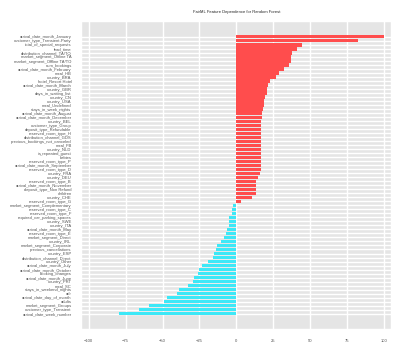

In [ ]:
SMALL_SIZE = 3

plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=6)  # fontsize of the figure title

# Generate feature dependence plot
fig = plot_dependencies(total.median(),
    reverse_values=False,
    title="FairML Feature Dependence for Random Forest"
)
plt.savefig("fairml_ldp.jpg", transparent=False, bbox_inches='tight', dpi=550)
fig

# PART 4: MODEL EXPLAINABILITY USING LIME

In [ ]:
from sklearn.preprocessing import LabelEncoder

feature_names = X_train_final.columns.tolist()

In [ ]:
# Determine the class names from y_train_final
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train_final.values.ravel())  # Assuming y_train_final is a DataFrame
class_names = list(label_encoder.classes_)

In [ ]:
# Identifying categorical features
categorical_features_indices = [i for i, col in enumerate(X_train_final.columns) if X_train_final[col].dtype == 'object']

# Extract categorical names for each categorical feature
categorical_names = {}
for index in categorical_features_indices:
    le = LabelEncoder()
    le.fit(X_train_final.iloc[:, index])
    categorical_names[index] = le.classes_.tolist()

In [ ]:
# Set up the LIME explainer
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=2d2bffbd4b2e36c053abdbad22d257bfeb43791108285a32d315c2d453a455e2
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Create the explainer instance
explainer = LimeTabularExplainer(X_train_final.values,
                                 feature_names=feature_names,
                                 class_names=class_names,
                                 categorical_features=categorical_features_indices,
                                 categorical_names=categorical_names,
                                 kernel_width=3,
                                 verbose=True)  # Verbose for more detailed output

In [ ]:
np.random.seed(1)
i = np.random.randint(0, X_train_final.shape[0])
exp = explainer.explain_instance(X_train_final.iloc[i].values,
                                 clf_rf_final.predict_proba,  # clf_rf_final is your RandomForest model
                                 num_features=5)
exp.show_in_notebook(show_all=False)

Intercept 0.43179649770049955
Prediction_local [0.32509389]
Right: 0.23
